# init package

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset for overfitting case

In [3]:
# load California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# data normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [4]:
# initialize model decision tree regressor
model = DecisionTreeRegressor(max_depth=50, random_state=42)

# train model with data train
model.fit(X_train, y_train)

# create prediction for data train and data test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Detect overfitting

## Evaluate performance in data test and data train

In [5]:
# counting mean squared error (MSE) for data train and data test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# show MSE result
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training MSE: 9.790037243329224e-32
Test MSE: 0.5243637747330264


## Learning Curve

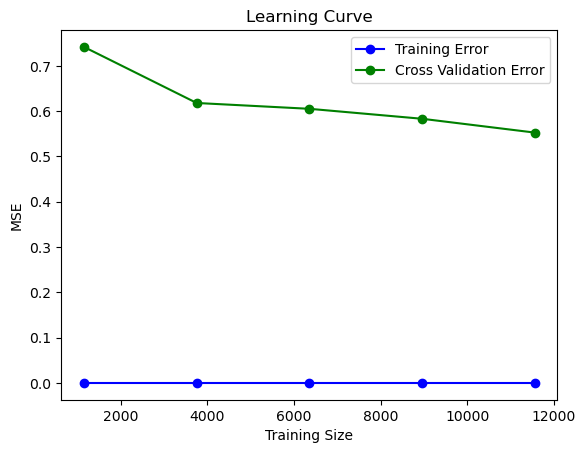

In [7]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# counting learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# counting average and standard deviation
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

# plot learnign curve
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Error')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross Validation Error')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Overcome overfitting

## Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score

# counting cross validation score with 5 fold
cross_val_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# show cross validation score
print(f'Cross-Validation MSE: {-cross_val_score.mean()}')

Cross-Validation MSE: 0.5550010846484291


## Regularization (Max Depth, Min Samples Split, Min Samples Leaf)

In [9]:
# create model decission tree with smaller depth
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reg.fit(X_train, y_train)

# evaluate into data train and data test
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)

# count MSE
train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)

print(f'Training MSE (After Regularization): {train_mse_reg}')
print(f'Test MSE (After Regularization): {test_mse_reg}')

Training MSE (After Regularization): 0.4928096322147045
Test MSE (After Regularization): 0.5210801561811793


## Pruning (Pruning manual with tree depth)

In [10]:
# using ccp_alpha to pruning (Cost Complexity Pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# train model using pruning
model_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alphas[-2])
model_pruned.fit(X_train, y_train)

# create predict
y_train_pred_pruned = model_pruned.predict(X_train)
y_test_pred_pruned = model_pruned.predict(X_test)

# counting MSE
train_mse_pruned = mean_squared_error(y_train, y_train_pred_pruned)
test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)

print(f'Pruned Model Training MSE: {train_mse_pruned}')
print(f'Pruned Model Test MSE: {test_mse_pruned}')

Pruned Model Training MSE: 0.9189620181001872
Pruned Model Test MSE: 0.9194598144703808


## Data augmentation

In [11]:
# add little noise into data as augmentation
X_train_aug = X_train + np.random.normal(0, 0.1, X_train.shape)

# train again model using augmented data
model_aug = DecisionTreeRegressor(max_depth=50, random_state=42)
model_aug.fit(X_train_aug, y_train)

# create prediction
y_train_pred_aug = model_aug.predict(X_train_aug)
y_test_pred_aug = model_aug.predict(X_test)

# counting MSE
train_mse_aug = mean_squared_error(y_train, y_train_pred_aug)
test_mse_aug = mean_squared_error(y_test, y_test_pred_aug)

print(f'Augmented Data Training MSE: {train_mse_aug}')
print(f'Augmented Data Test MSE: {test_mse_aug}')

Augmented Data Training MSE: 8.528585121947352e-32
Augmented Data Test MSE: 0.7476661515646479


## Dropout

In [12]:
from sklearn.ensemble import RandomForestRegressor

# init Random Forest with n_estimators (total tree)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# train model
model_rf.fit(X_train, y_train)

# create predict
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

# counting MSE
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print(f'Random Forest Training MSE: {train_mse_rf}')
print(f'Random Forest Test MSE: {test_mse_rf}')

Random Forest Training MSE: 0.1694284568053241
Random Forest Test MSE: 0.29472611994199227


# Load Dataset for underfitting case

In [15]:
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier


model_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
model_underfit.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [17]:
y_train_pred_underfit = model_underfit.predict(X_train)
y_test_pred_underfit = model_underfit.predict(X_test)

# Detect underfitting

## evaluate performance into data train and data test

In [18]:
# evaluate perforamance into data train and data test
train_acc_underfit = (y_train == y_train_pred_underfit)
test_acc_underfit = (y_test == y_test_pred_underfit)

print(f'Underfitting Training Accuracy: {train_acc_underfit.mean()}')
print(f'Underfitting Test Accuracy: {test_acc_underfit.mean()}')

Underfitting Training Accuracy: 0.9246231155778895
Underfitting Test Accuracy: 0.8947368421052632


## Learning Curve

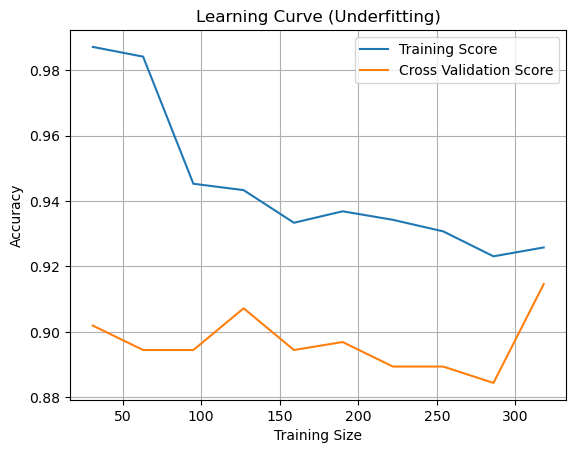

In [19]:
# learning curve to check performance into various training size
train_sizes, train_scores, test_scores = learning_curve(model_underfit, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross Validation Score')
plt.ylabel('Accuracy')
plt.xlabel('Training Size')
plt.title('Learning Curve (Underfitting)')
plt.legend()
plt.grid(True)
plt.show()

## Check model complexity

In [21]:
# compare with complex model (e.g., max_depth=50)
from sklearn.metrics import accuracy_score


model_complex = DecisionTreeClassifier(max_depth=50, random_state=42)
model_complex.fit(X_train, y_train)

y_train_pred_complex = model_complex.predict(X_train)
y_test_pred_complex = model_complex.predict(X_test)

train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)

print(f'Complex Model Training Accuracy: {train_acc_complex}')
print(f'Complex Model Test Accuracy: {test_acc_complex}')

Complex Model Training Accuracy: 1.0
Complex Model Test Accuracy: 0.9415204678362573


# Overcome Underfitting

## Use complex model

In [23]:
complex_model = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model.fit(X_train, y_train)

y_train_pred_complex = complex_model.predict(X_train) 
y_test_pred_complex = complex_model.predict(X_test)

train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)

print(f'Complex Model Training Accuracy: {train_acc_complex}')
print(f'Complex Model Test Accuracy: {test_acc_complex}')

Complex Model Training Accuracy: 1.0
Complex Model Test Accuracy: 0.9415204678362573


## Add more feature (Feature Engineering with PCA)

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# devide data into training and data test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# model with PCA result feature
complex_model_pca = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model_pca.fit(X_train_pca, y_train_pca)

# predict data train and data test
y_train_pred_pca = complex_model_pca.predict(X_train_pca)
y_test_pred_pca = complex_model_pca.predict(X_test_pca)

# evaluate performance
train_acc_pca = accuracy_score(y_train_pca, y_train_pred_pca)
test_acc_pca = accuracy_score(y_test_pca, y_test_pred_pca)

print(f'Training Accuracy (PCA): {train_acc_pca}')
print(f'Test Accuracy (PCA): {test_acc_pca}')

Training Accuracy (PCA): 1.0
Test Accuracy (PCA): 0.9415204678362573


## Hyperparameter tuning using GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

# Grid Search for hyperparameter tuning
param_grid = {
  'max_depth': [5, 10, 150],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# do the best search hyperparameter
grid_search.fit(X_train, y_train)

# the best hyperparameter
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict using the best model
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

# evaluate performance
train_acc_best = best_model.score(X_train, y_train_pred_best)
test_acc_best = best_model.score(X_test, y_test_pred_best)

print(f'Training Accuracy (Best Model): {train_acc_best}')
print(f'Test Accuracy (Best Model): {test_acc_best}')
print(f'Best Hyperparameter: {best_params}')

Training Accuracy (Best Model): 1.0
Test Accuracy (Best Model): 1.0
Best Hyperparameter: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


## fix preprocessing data

In [28]:
# do normalization again using scaler
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X)

# devide again data train and data test
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_new, y, test_size=0.3, random_state=42)

# model after preprocessing data better
model_after_scaling = DecisionTreeClassifier(max_depth=10, random_state=42)
model_after_scaling.fit(X_train_scaled, y_train_scaled)

# predict
y_train_pred_scaled = model_after_scaling.predict(X_train_scaled)
y_test_pred_scaled = model_after_scaling.predict(X_test_scaled)

# evaluate performance
train_acc_scaled = accuracy_score(y_train_scaled, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test_scaled, y_test_pred_scaled)

print(f'Training Accuracy (After Scaling): {train_acc_scaled}')
print(f'Test Accuracy (After Scaling): {test_acc_scaled}')

Training Accuracy (After Scaling): 1.0
Test Accuracy (After Scaling): 0.9415204678362573


## Add data train

In [29]:
# Divide again data with more data train (add size training set)
X_train_more_data, X_test_less_data, y_train_more_data, y_test_less_data = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# model with more data train
model_more_data = DecisionTreeClassifier(max_depth=10, random_state=42)
model_more_data.fit(X_train_more_data, y_train_more_data)

# predict
y_train_pred_more_data = model_more_data.predict(X_train_more_data)
y_test_pred_more_data = model_more_data.predict(X_test_less_data)

# evaluate performance
train_acc_more_data = accuracy_score(y_train_more_data, y_train_pred_more_data)
test_acc_more_data = accuracy_score(y_test_less_data, y_test_pred_more_data)

print(f'Training Accuracy (More Data): {train_acc_more_data}')
print(f'Test Accuracy (More Data): {test_acc_more_data}')

Training Accuracy (More Data): 1.0
Test Accuracy (More Data): 0.9473684210526315
